# Data Preprocessing and Early EDA

This is the early stage of the project's process, and I will mostly deal with the structure of the data, analyze irregularities, anomalies, and make decisions aligned with the project's goal.

This stage includes Data Preprocessing and basic Exploratory Data Analysis (EDA) with the following structure:

<ul>
  <li>1. Imports</li>
  <li>2. Data</li>
  <li>3. Early EDA and Data Cleaning </li>
    <ul>
      <li>3.1 Missing values</li>
      <li>3.2 Duplicate rows</li>
      <li>3.3 Outliers and noisiness</li>
      <li>3.4 Mismatched data types</li>
      <li>3.5 Structural errors</li>
      <li>3.6 Saving data for the next stage</li>
    </ul>
</ul>

# 1. Imports

In [1]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd

#visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#time and warnings
import time
import warnings

#settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

# 2. Data

Initial observations showed the following:

- There are a total of 5043 entries, 26 features with types: float64(12), int64(3), object(11)
- First observation showed that scales differ greatly, namely *gross* and *budget* in comparison to other features.

In [2]:
#loading data into a pandas dataframe
movies = pd.read_csv('data/movie_data.csv')

In [3]:
#inspecting the first five rows
movies.head()

color      director_name  num_critic_reviews  duration  \
0  Color      James Cameron               723.0     178.0   
1  Color     Gore Verbinski               302.0     169.0   
2  Color         Sam Mendes               602.0     148.0   
3  Color  Christopher Nolan               813.0     164.0   
4    NaN        Doug Walker                 NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_reviews language  country  content_rating       budget title_year  \
0           3054.0  English      USA           PG-13  237000000.0     2009.0   
1           1238.0  English      USA           PG-13  300000000.0     2007.0   
2            994.0  English       UK           PG-13  245000000.0     2015.0   
3           2701.0  English      USA           PG-13  250000000.0     2012.0   
4              NaN      NaN      NaN             NaN          NaN        NaN   

   actor_2_facebook_likes movie_score aspect_ratio movie_facebook_likes  
0                   936.0         7.9         1.78                33000  
1                  5000.0         7.1         2.35                    0  
2                   393.0         6.8         2.35                85000  
3                 23000.0         8.5         2.35               164000  
4                    12.0         7.1          NaN                    0  

[5 rows x 26 columns]

In [4]:
#fetching basic information on the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

# 3. Early EDA and Data Cleaning

# 3.1 Missing values

**Analysis**

* There are total of 2685 missing values, highest percent of missing values are the target value *gross* 17.52%, followed by *budget* 9.75%. Other features show little to insignificant percent of missing values.
* Distribution matrix shows no obvious patterns in the distribution of the missing values
* The heatmap visualizes the nullity correlation between the columns in the dataset. The heatmap shows no negative correlation between features. Negative correlation means that if the value of one variable is present then the value of other variables is definitely absent. There are few no correlation spaces which represent that **variables values present or absent do not have any effect on one another**. 
* **Majority of correlations are in fact positive**, and that indicates that if the value of one variable is present then the value of the other is definitely present. Positive correlations are highest among director_name, title_year, actor_2_name, actor_3_facebook_likes etc. Budget and gross show a low to medium positive correlation among all columns.

**Recommendation**

* Best course of action would be to remove movies with missing budget values, and scrape for gross values of the remaining movies.

**Action taken**

* Because the time needed to research and input missing data exceeded this projects time frame goals, I decided to remove the missing data from the dataset.

In [5]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', movies.isnull().values.sum())
print('Percent of missing values per feature: ') 
movies.isnull().sum() * 100 / len(movies)

Number of missing values:  2685
Percent of missing values per feature: 


color                         0.376760
director_name                 2.062265
num_critic_reviews            0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_users_voted               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
plot_keywords                 3.033908
num_user_reviews              0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
movie_score                   0.000000
aspect_ratio                  6.523895
movie_facebook_likes     

<AxesSubplot:>

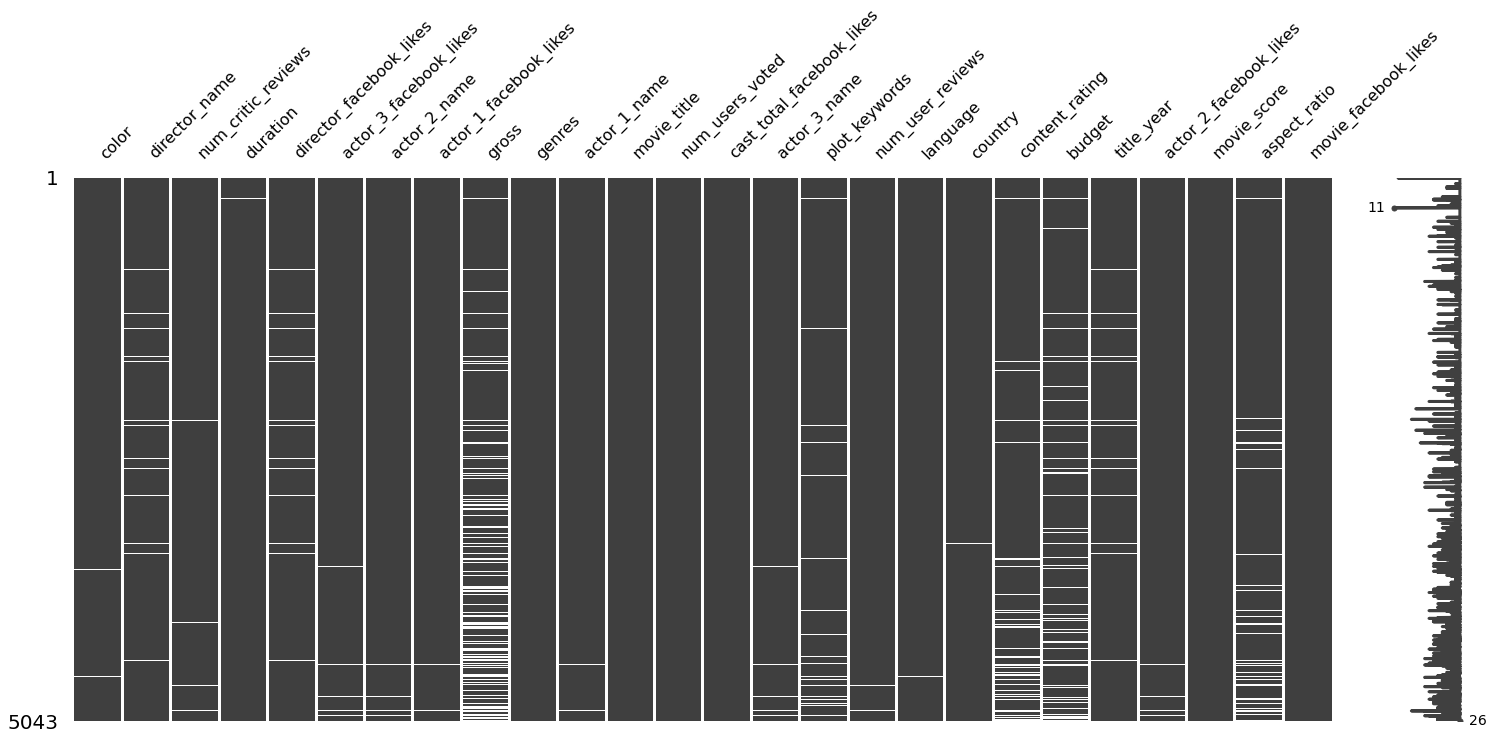

In [6]:
#matrix map of missing values
msno.matrix(movies)

<AxesSubplot:>

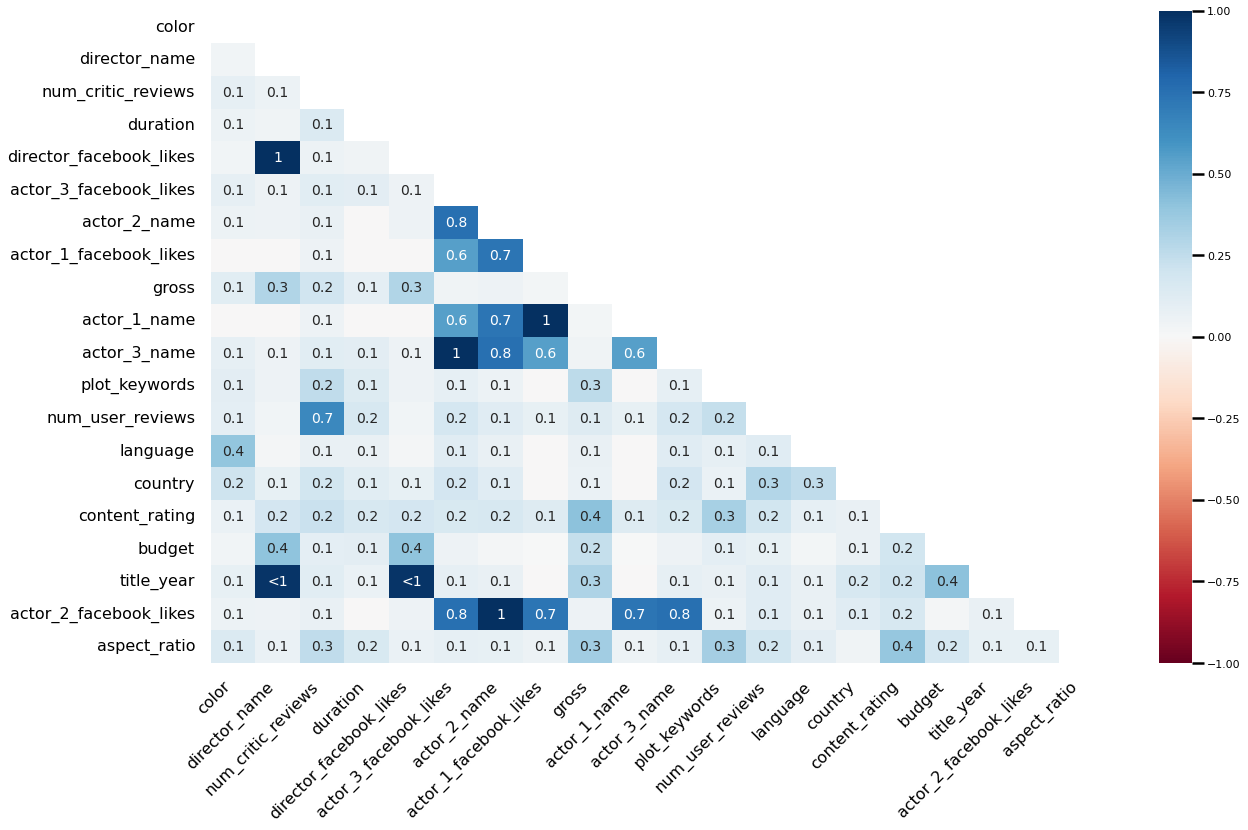

In [7]:
#heatmap of missing values
msno.heatmap(movies)

In [8]:
#removing missing values
movies.dropna(inplace=True)

In [9]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

color      director_name  num_critic_reviews  duration  \
0  Color      James Cameron               723.0     178.0   
1  Color     Gore Verbinski               302.0     169.0   
2  Color         Sam Mendes               602.0     148.0   
3  Color  Christopher Nolan               813.0     164.0   
4  Color     Andrew Stanton               462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   640.0   73058679.0          Action|Adventure|Sci-Fi  ...   

  num_user_reviews language  country  content_rating       budget title_year  \
0           3054.0  English      USA           PG-13  237000000.0     2009.0   
1           1238.0  English      USA           PG-13  300000000.0     2007.0   
2            994.0  English       UK           PG-13  245000000.0     2015.0   
3           2701.0  English      USA           PG-13  250000000.0     2012.0   
4            738.0  English      USA           PG-13  263700000.0     2012.0   

   actor_2_facebook_likes movie_score aspect_ratio movie_facebook_likes  
0                   936.0         7.9         1.78                33000  
1                  5000.0         7.1         2.35                    0  
2                   393.0         6.8         2.35                85000  
3                 23000.0         8.5         2.35               164000  
4                   632.0         6.6         2.35                24000  

[5 rows x 26 columns]

In [10]:
print('Number of missing values: ', movies.isnull().values.sum())
print('Data lenght: ', len(movies))

Number of missing values:  0
Data lenght:  3761


# 3.2 Duplicate values

**Analysis**

- There are total of 247 duplicate rows.

**Action taken**

- Duplicate rows will be removed on the movie_title column.

In [11]:
#removing duplicate rows based on the 'movie_title' column
movies.drop_duplicates(subset=['movie_title'], keep=False, inplace=True)

In [12]:
print('Data length: ', len(movies))

Data length:  3565


In [13]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

color      director_name  num_critic_reviews  duration  \
0  Color      James Cameron               723.0     178.0   
1  Color     Gore Verbinski               302.0     169.0   
2  Color         Sam Mendes               602.0     148.0   
3  Color  Christopher Nolan               813.0     164.0   
4  Color     Andrew Stanton               462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   640.0   73058679.0          Action|Adventure|Sci-Fi  ...   

  num_user_reviews language  country  content_rating       budget title_year  \
0           3054.0  English      USA           PG-13  237000000.0     2009.0   
1           1238.0  English      USA           PG-13  300000000.0     2007.0   
2            994.0  English       UK           PG-13  245000000.0     2015.0   
3           2701.0  English      USA           PG-13  250000000.0     2012.0   
4            738.0  English      USA           PG-13  263700000.0     2012.0   

   actor_2_facebook_likes movie_score aspect_ratio movie_facebook_likes  
0                   936.0         7.9         1.78                33000  
1                  5000.0         7.1         2.35                    0  
2                   393.0         6.8         2.35                85000  
3                 23000.0         8.5         2.35               164000  
4                   632.0         6.6         2.35                24000  

[5 rows x 26 columns]

# 3.3 Outliers and noisiness

**Analysis**

- There is a hige spike in the *budget* feature that was discovered to be an incorrect value
- Values of both *gross* and *budget* are expressed in 6-to7-digit numbers and are quite uninterpretable

**Action taken**

- The incorrect budget value was replaced by a correct one from the IMDB website
- *gross* and *budget* are converted to millions for better interpretability in two new features

In [14]:
#separating numerical features from the categorical
num_movies = movies.select_dtypes(include=['float64', 'int64'])

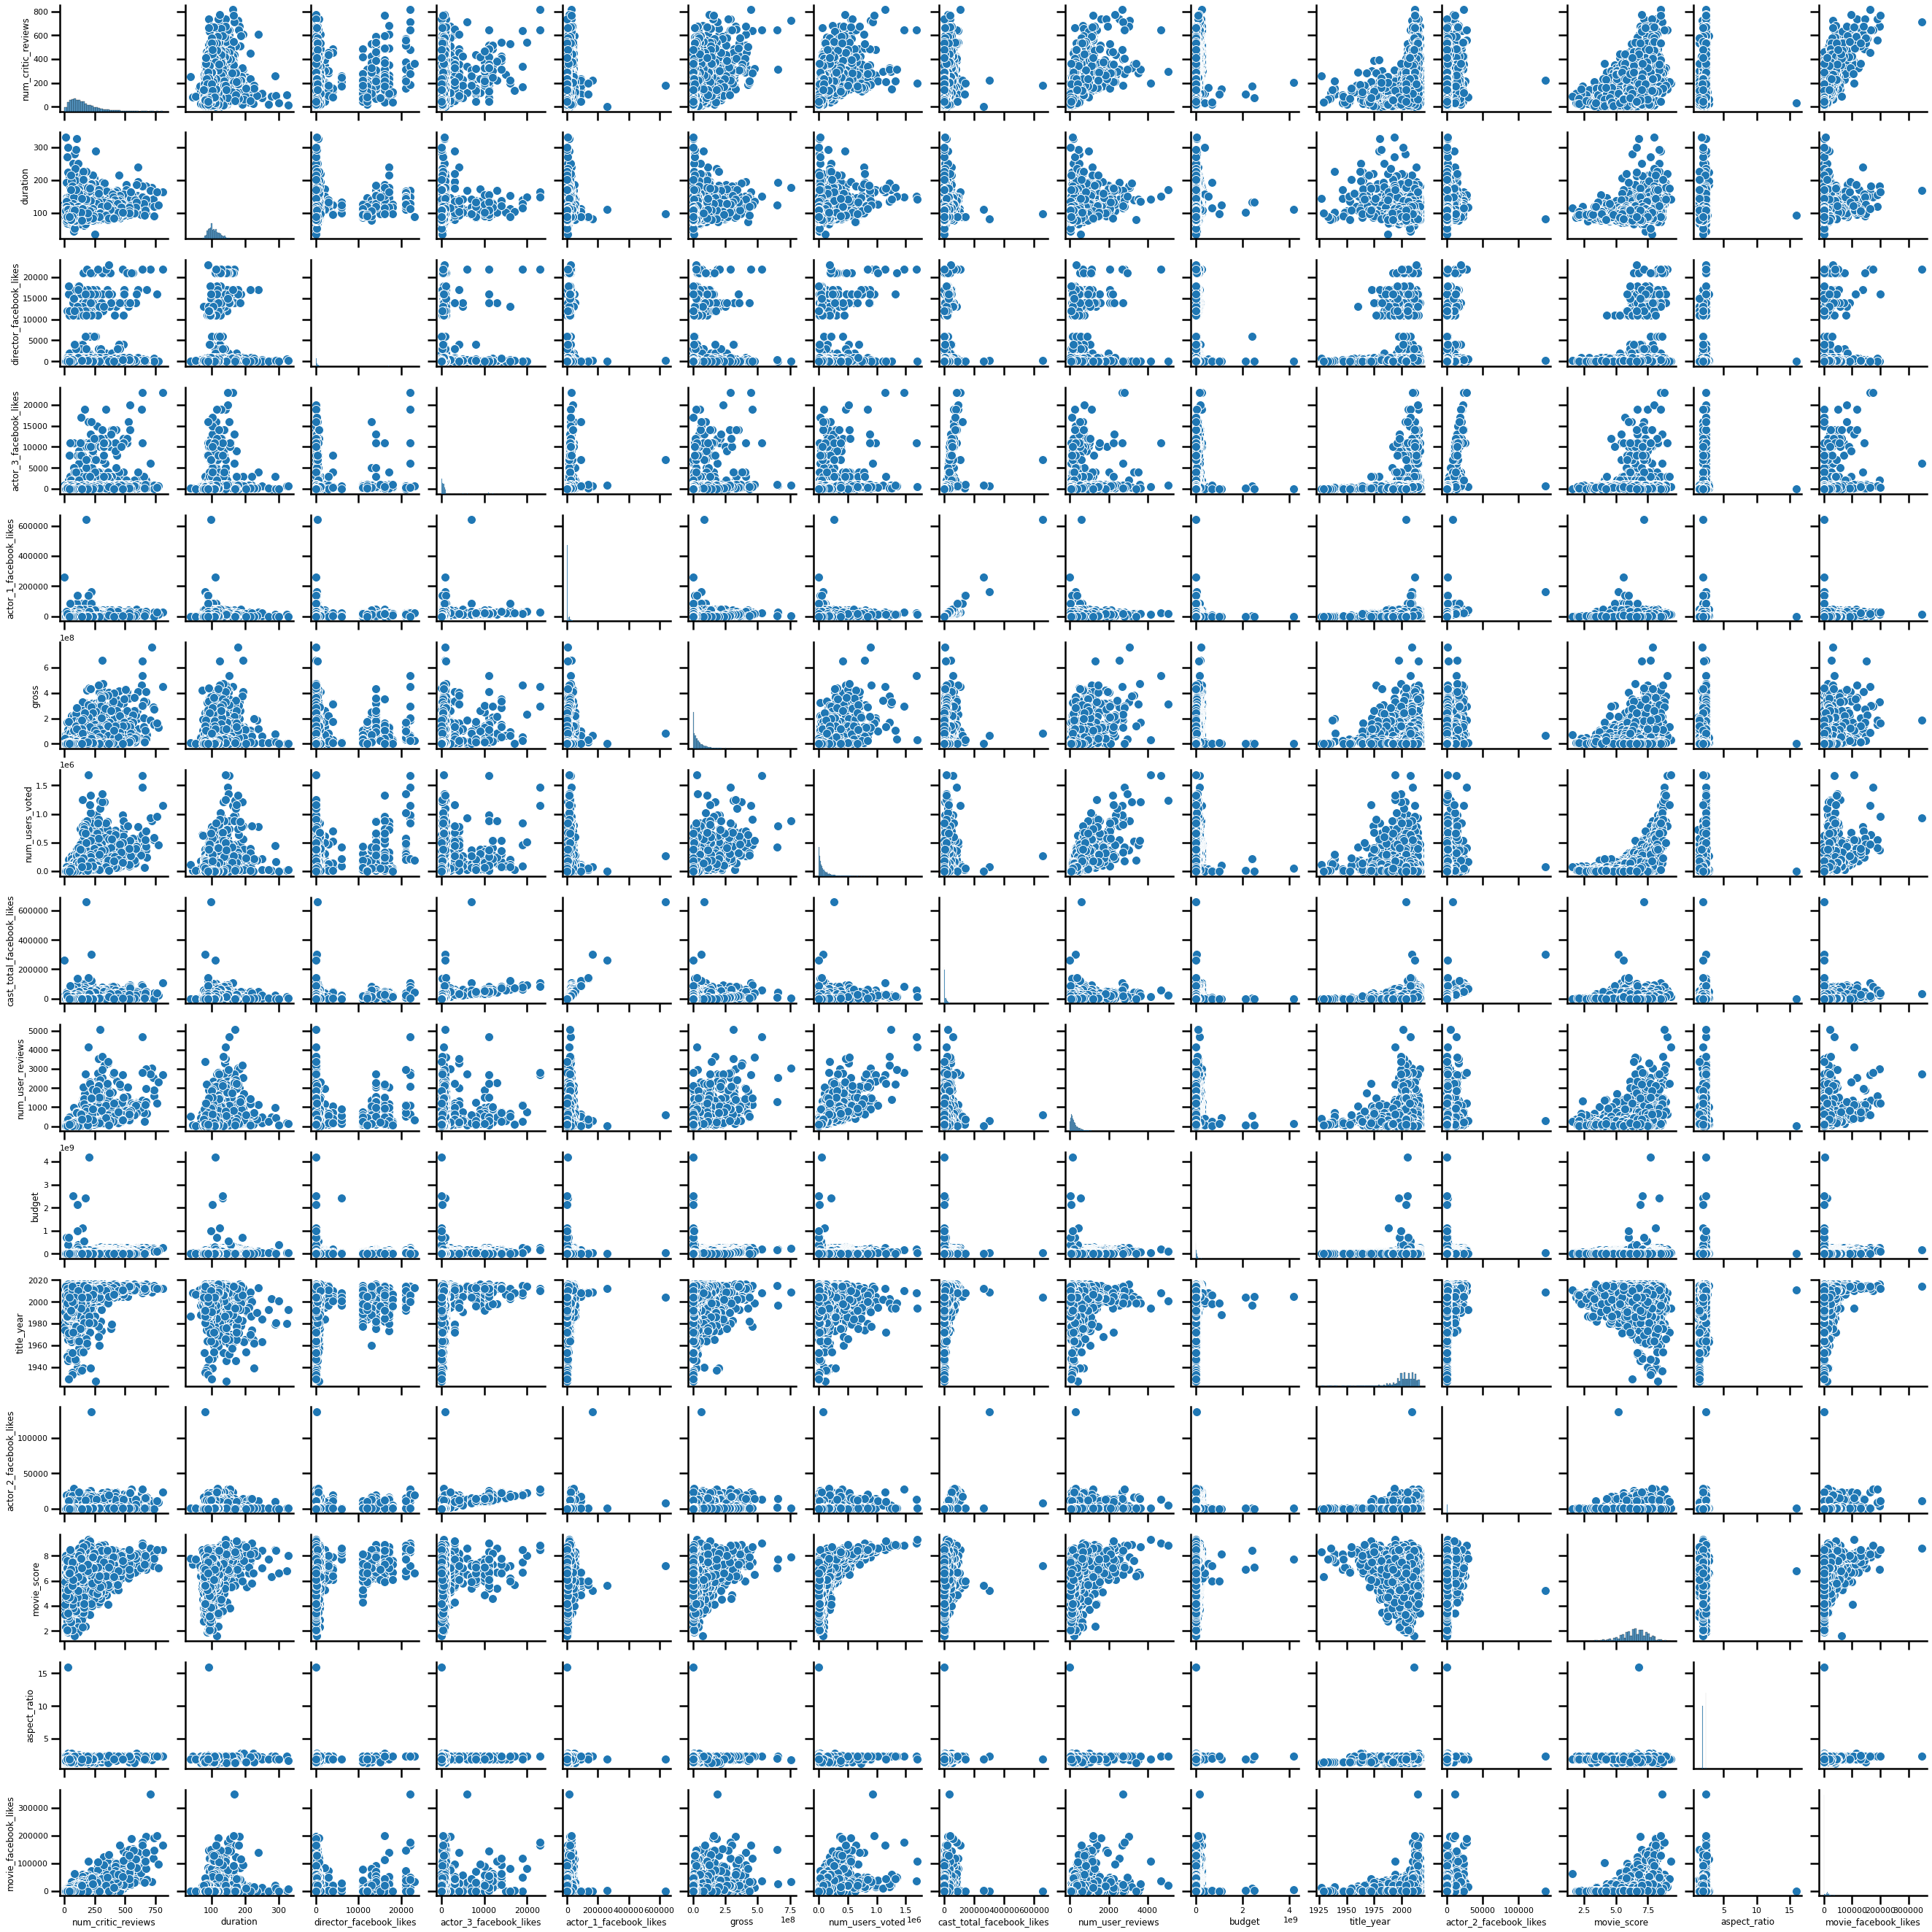

In [15]:
#visualizing numerical features using pairplot
sns.pairplot(num_movies);

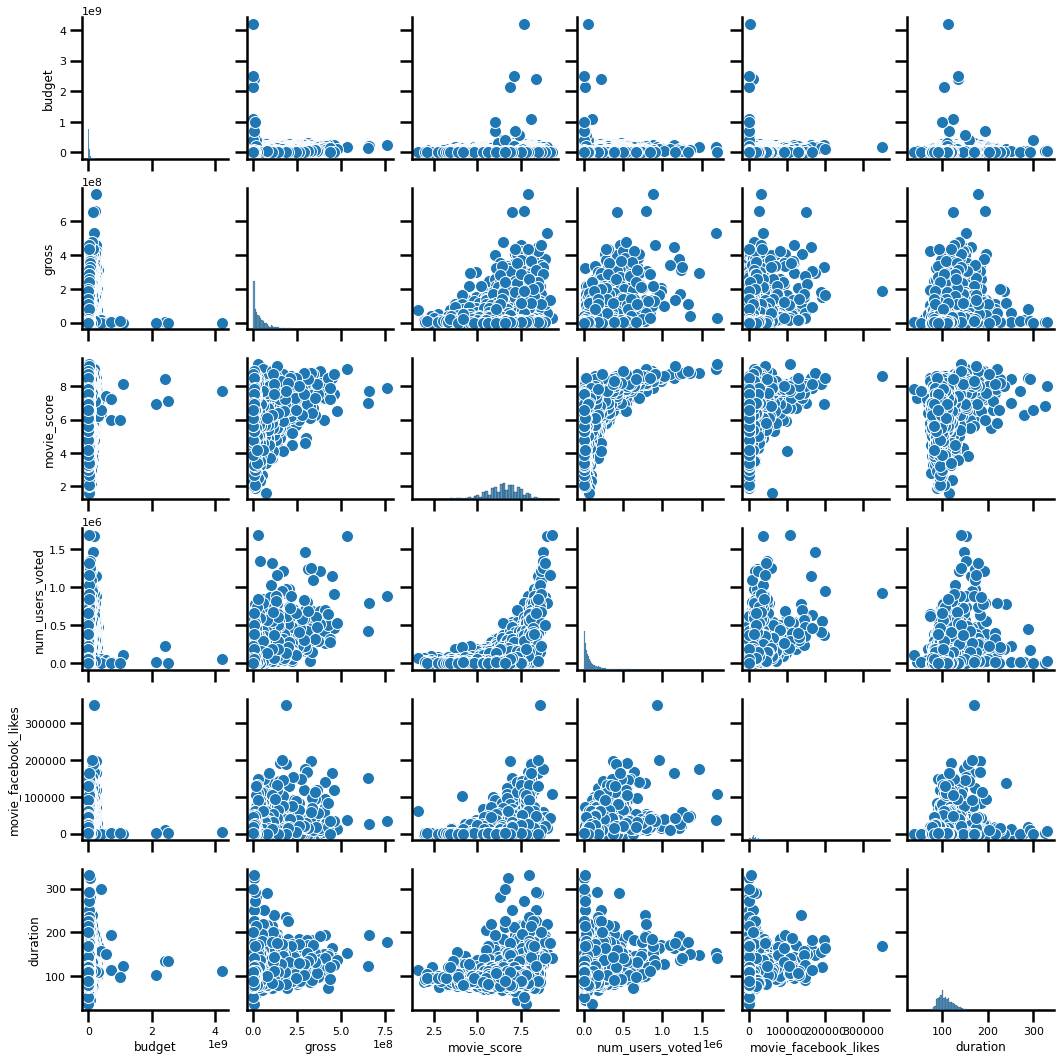

In [16]:
#visualizing couple of features I deemed useful
sns.pairplot(num_movies[['budget', 'gross', 'movie_score', 'num_users_voted', 'movie_facebook_likes', 'duration']]);

**Converting budget and gross to a more interpretable value expressed in millions**

In [17]:
#converting budget to million
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

#converting gross to million
movies['gross ($) millions'] = (movies['gross'].astype(float)/1000000).round(2)
movies.head(1)

color  director_name  num_critic_reviews  duration  \
0  Color  James Cameron               723.0     178.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   

  country content_rating       budget  title_year actor_2_facebook_likes  \
0     USA          PG-13  237000000.0      2009.0                  936.0   

  movie_score  aspect_ratio movie_facebook_likes budget ($) millions  \
0         7.9          1.78                33000               237.0   

  gross ($) millions  
0             760.51  

[1 rows x 28 columns]

In [18]:
#converting gross to million
movies['num_voted_mill'] = (movies['num_users_voted'].astype(float)/1000000).round(2)
movies.head(1)

color  director_name  num_critic_reviews  duration  \
0  Color  James Cameron               723.0     178.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   

  content_rating       budget  title_year  actor_2_facebook_likes movie_score  \
0          PG-13  237000000.0      2009.0                   936.0         7.9   

  aspect_ratio  movie_facebook_likes budget ($) millions gross ($) millions  \
0         1.78                 33000               237.0             760.51   

  num_voted_mill  
0           0.89  

[1 rows x 29 columns]

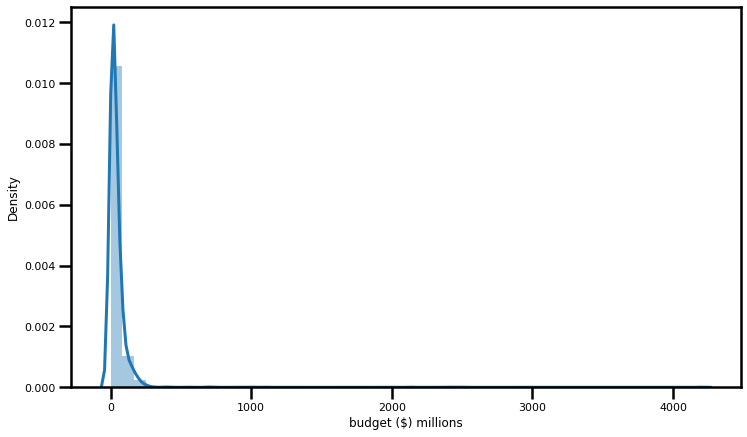

In [19]:
#zooming in on a potential anomaly that was detected in the previous plot concerning the budget feature 
f, ax = plt.subplots(figsize=(12,7))
sns.distplot(movies['budget ($) millions'],ax=ax);

In [20]:
#locating the incorrect value
movies[movies['budget'] == 390000000.0]

color director_name  num_critic_reviews  duration  \
915  Color    Luc Besson               111.0     158.0   

     director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
915                      0.0                    15.0  David Bailie   

     actor_1_facebook_likes       gross  \
915                    51.0  14131298.0   

                                    genres  ... content_rating       budget  \
915  Adventure|Biography|Drama|History|War  ...              R  390000000.0   

     title_year  actor_2_facebook_likes movie_score aspect_ratio  \
915      1999.0                    40.0         6.4         2.35   

     movie_facebook_likes budget ($) millions gross ($) millions  \
915                     0               390.0              14.13   

    num_voted_mill  
915           0.06  

[1 rows x 29 columns]

In [21]:
#removing the invalid budgetvalue and replacing it with the proper one
movies['budget'] = movies['budget'].replace(390000000.0, 60000000.0)

In [22]:
#updating the budget in millions column
movies['budget ($) millions'] = (movies['budget'].astype(float)/1000000).round(2)

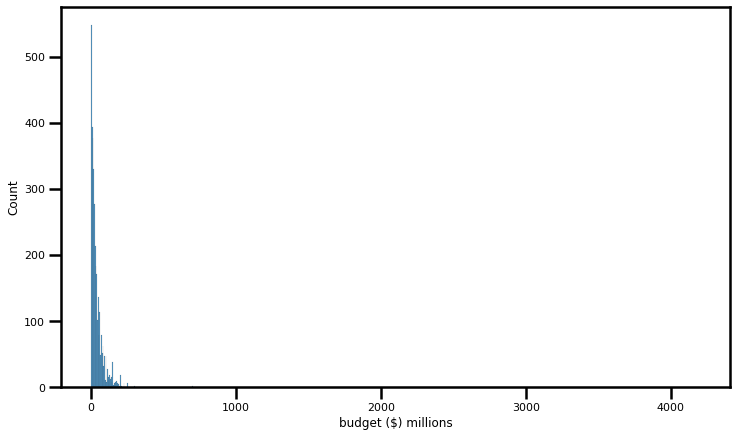

In [23]:
#visualizing budget values
f, ax = plt.subplots(figsize=(12,7))
sns.histplot(movies['budget ($) millions'],ax=ax);

# 3.4 Mismatched data types

**Analysis**

- On further research I identified huge outliers in the budget value, which I procedeed to identify as a currency mismatch. The currencies of *gross* and *budget* values correspond to their county of origin: The highest value is a South Korean movie with a budget of 4000 million Korean wons (KRW)

- All USA movies appear to have the same curency: US dollar. All non-USA English speaking countries (New Zealand, UK, Australia etc.) appear to have their budgets expressed in US dollars.

**Recommendation**

- The best course of action would be to update the budget values to a uniform currency in USD. However, this raises a couple of questions: are budget values corrected for inflation accross all coutries in the dataset, and is there a reliable way to convert said budget values to another currency? The answers to both questions need to be asked from the source in order to make said updates to he dataset.

**Action taken**

- Because of the limited project time frame, I decided to remove all non-English speaking movies from the dataset.

In [24]:
#exploring outliers and identifying if the currency between gross and budget matches
budget_over_250 = movies[movies['budget ($) millions'] > 250]
budget_over_250[['country', 
                 'language',
                 'movie_title', 
                 'budget ($) millions', 
                 'gross ($) millions']].sort_values('budget ($) millions', ascending=False)

country   language                                movie_title  \
3109  South Korea     Korean                            Lady Vengeance    
2566      Hungary  Hungarian                                  Fateless    
2036        Japan   Japanese                         Princess Mononoke    
2046        Japan   Japanese                                  Steamboy    
2841        Japan   Japanese                                     Akira    
3398        Japan   Japanese                             Godzilla 2000    
2610        India      Hindi                    Kabhi Alvida Naa Kehna    
3104        Spain    Spanish                                     Tango    
1203        China   Mandarin                                 Red Cliff    
2771     Thailand       Thai                  The Legend of Suriyothai    
1             USA    English  Pirates of the Caribbean: At World's End    
2359     Thailand       Thai                                 Ong-bak 2    
4             USA    English                               John Carter    
5             USA    English                                   Tangled    

      budget ($) millions  gross ($) millions  
3109              4200.00                0.21  
2566              2500.00                0.20  
2036              2400.00                2.30  
2046              2127.52                0.41  
2841              1100.00                0.44  
3398              1000.00               10.04  
2610               700.00                3.28  
3104               700.00                1.69  
1203               553.63                0.63  
2771               400.00                0.45  
1                  300.00              309.40  
2359               300.00                0.10  
4                  263.70               73.06  
5                  260.00              200.81

In [25]:
#keeping only the English speaking movies
movies = movies[movies.language == 'English']

In [26]:
#resetting the index
movies.reset_index(drop=True, inplace=True)
movies.head()

color      director_name  num_critic_reviews  duration  \
0  Color      James Cameron               723.0     178.0   
1  Color     Gore Verbinski               302.0     169.0   
2  Color         Sam Mendes               602.0     148.0   
3  Color  Christopher Nolan               813.0     164.0   
4  Color     Andrew Stanton               462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   640.0   73058679.0          Action|Adventure|Sci-Fi  ...   

  content_rating       budget  title_year  actor_2_facebook_likes movie_score  \
0          PG-13  237000000.0      2009.0                   936.0         7.9   
1          PG-13  300000000.0      2007.0                  5000.0         7.1   
2          PG-13  245000000.0      2015.0                   393.0         6.8   
3          PG-13  250000000.0      2012.0                 23000.0         8.5   
4          PG-13  263700000.0      2012.0                   632.0         6.6   

  aspect_ratio  movie_facebook_likes budget ($) millions gross ($) millions  \
0         1.78                 33000               237.0             760.51   
1         2.35                     0               300.0             309.40   
2         2.35                 85000               245.0             200.07   
3         2.35                164000               250.0             448.13   
4         2.35                 24000               263.7              73.06   

  num_voted_mill  
0           0.89  
1           0.47  
2           0.28  
3           1.14  
4           0.21  

[5 rows x 29 columns]

In [27]:
movies['language'].value_counts()

English    3410
Name: language, dtype: int64

# 3.5 Structural errors

**Analysis**

- Initial exploration showed no obvious incosistencies or irregularities in the categorical features.

In [28]:
movies['genres'].value_counts()

Comedy|Drama|Romance                           138
Comedy                                         137
Comedy|Drama                                   128
Comedy|Romance                                 127
Drama                                          121
                                              ... 
Action|Adventure|Comedy|Crime|Music|Mystery      1
Action|Biography|Crime|Drama|Thriller            1
Adventure|Comedy|Crime|Drama|Family              1
Action|Biography|Drama|History|War               1
Comedy|Crime|Horror                              1
Name: genres, Length: 713, dtype: int64

In [29]:
movies['plot_keywords'].value_counts()

avatar|future|marine|native|paraplegic                               1
bank|carnival|motorcycle|police|rookie cop                           1
chicago illinois|false identity|femme fatale|new york city|spying    1
army|bomb|dangerous job|death|iraq                                   1
captain|experiment|fire|psychic|secret government agency             1
                                                                    ..
animal experimentation|chimera|island|jungle|mutant                  1
guard|king|murder|musketeer|swordsman                                1
children|court|king|king henry viii|love                             1
advertising|cancer|dog|san francisco california|terminal illness     1
actress name in title|crush|date|four word title|video camera        1
Name: plot_keywords, Length: 3410, dtype: int64

In [30]:
movies['country'].value_counts()

USA               2822
UK                 290
France              69
Germany             65
Canada              56
Australia           34
Spain               14
New Zealand          8
Ireland              7
Japan                6
Italy                5
Denmark              5
Hong Kong            4
South Korea          3
South Africa         3
Czech Republic       2
China                2
Belgium              1
Iceland              1
Thailand             1
Georgia              1
Iran                 1
Official site        1
Greece               1
Hungary              1
Russia               1
Peru                 1
Chile                1
Romania              1
New Line             1
Aruba                1
Poland               1
Name: country, dtype: int64

In [31]:
movies['color'].value_counts()

Color              3304
Black and White     106
Name: color, dtype: int64

In [32]:
movies['content_rating'].value_counts()

R            1534
PG-13        1188
PG            530
G              83
Not Rated      23
Unrated        17
Approved       16
X               7
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

# 3.6 Saving data for the next stage

In [33]:
movies.to_csv('data/movies_preprocessed.csv')